<a href="https://colab.research.google.com/github/rajenbala/dlaicourse/blob/master/ANNRegression_Exam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Tensorflow

import tensorflow as tf
import numpy as np
print(tf.__version__)

2.4.1


Exam 1:
TensorFlow developer skills
You need to demonstrate that you understand how to develop software programs using TensorFlow and that you can find the information you need to work as an ML practitioner. 
You need to:

1. Know how to program in Python, resolve Python issues, and compile and run Python programs in PyCharm.
2. Know how to find information about TensorFlow APIs, including how to find guides and API references on tensorflow.org.
3. Knowhowtodebug,investigate,andsolveerrormessagesfromtheTensorFlowAPI.
4. Knowhowtosearchbeyondtensorflow.org,asandwhennecessary,tosolveyourTensorFlow
questions.
5. KnowhowtocreateMLmodelsusingTensorFlowwherethemodelsizeisreasonableforthe 
problem being solved.
6. KnowhowtosaveMLmodelsandcheckthemodelfilesize.
7. UnderstandthecompatibilitydiscrepanciesbetweendifferentversionsofTensorFlow.

In [2]:
# Sample 4:
sampleFourFeatures = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
sampleFourTargets = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])



In [3]:
#Step 1: Model Creation

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=20,activation="relu",input_shape=(1,)),
                             tf.keras.layers.Dense(units=5,activation="relu"),
                             tf.keras.layers.Dense(units=1) # Note: No activation function in the final layer  t
])

In [4]:
#Step 2: Compile

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss=tf.keras.losses.mean_absolute_error,metrics=["accuracy","mae"])

In [5]:
#Step 3: fit

model.fit(sampleFourFeatures,sampleFourTargets,epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 607ms/step - loss: 13.2050 - accuracy: 0.0000e+00 - mae: 13.2050
Epoch 2/500
1/1 [==============================] - 0s 8ms/step - loss: 12.9576 - accuracy: 0.0000e+00 - mae: 12.9576
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 12.7125 - accuracy: 0.0000e+00 - mae: 12.7125
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 12.4684 - accuracy: 0.0000e+00 - mae: 12.4684
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 12.2482 - accuracy: 0.0000e+00 - mae: 12.2482
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 12.0580 - accuracy: 0.0000e+00 - mae: 12.0580
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 11.8608 - accuracy: 0.0000e+00 - mae: 11.8608
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 11.6534 - accuracy: 0.0000e+00 - mae: 11.6534
Epoch 9/500
1/1 [==============================] - 0s 3ms/step

In [6]:
model.predict([14.0])

# SGD - 1.241
# Adam - 0.203

array([[23.842966]], dtype=float32)

In [7]:
# Working a larger  Data

X=tf.range(-100,100,4)
y=X+10
X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [8]:
X_train= X[:40]
y_train=y[:40]

X_test=X[40:]
y_test=y[40:]

X_train,X_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>)

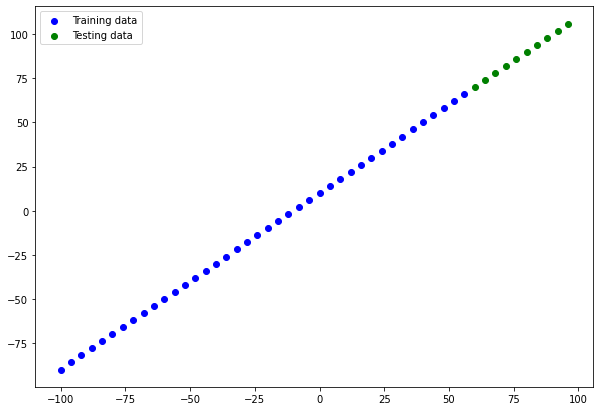

In [10]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data") # want our model to be able to predict this (given X, what's y?)
# Show a legend
plt.legend();


In [43]:

newModel=tf.keras.models.Sequential([
        tf.keras.layers.Dense(6,activation="relu",input_shape=(1,),name="First_Layer"),
        tf.keras.layers.Dense(1,activation="relu")
],name="New_Model")



In [49]:
newModel.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss=tf.keras.losses.mae,metrics=(["accuracy"]))

In [50]:
newModel.fit(X_train,y_train,epochs=5,validation_data=(X_test, y_test),verbose=0)

In [28]:
newModel.summary()

#input shape =1  , Output shape =6 (number of dense layers)
# Param = 1 * 6(weights) + 6(bias) 

Model: "New Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
First_Layer (Dense)          (None, 6)                 12        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train

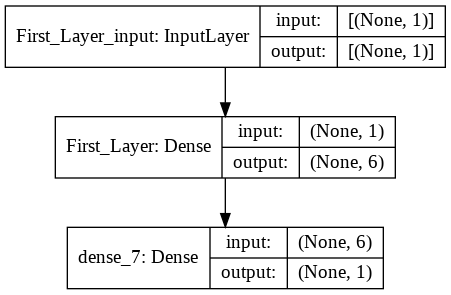

In [27]:
from tensorflow.keras.utils import plot_model

plot_model(model = newModel, show_shapes=True)

In [76]:
y_pred = newModel.predict(X_test)

In [40]:
# Plot Predictions

def plot_predictions(train_data=X_train, train_label=y_train, test_data=X_test, test_label=y_test, predicted_label= y_pred):
  plt.figure(figsize=(10,10))

  plt.scatter(train_data,train_label, c="blue", label ="Training Data")
  plt.scatter(test_data,test_label,c="red",label="Test Data")
  plt.scatter(test_data,predicted_label,c="green", label="Predicted Data")

  plt.legend()


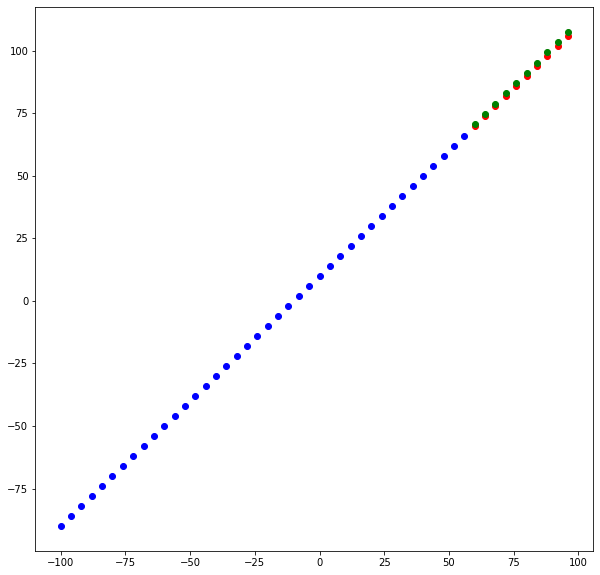

In [39]:
plot_predictions()

In [77]:
newModel.evaluate(X_test,y_test)

1/1 [==============================] - 0s 92ms/step - loss: 63.7596 - accuracy: 0.0000e+00


[63.75957489013672, 0.0]

In [78]:
tf.keras.losses.MAE(y_true=y_test,y_pred=y_pred).numpy()


array([69.27618 , 68.05026 , 66.824356, 65.59844 , 64.372536, 63.146618,
       61.920715, 60.6948  , 59.468884, 58.24298 ], dtype=float32)

In [79]:
tf.metrics.mean_absolute_error(y_test,y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([69.27618 , 68.05026 , 66.824356, 65.59844 , 64.372536, 63.146618,
       61.920715, 60.6948  , 59.468884, 58.24298 ], dtype=float32)>

In [80]:
y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)>

In [81]:
tf.constant(y_pred) # Dimension is of Rank 2 for y_pred whereas its Rank 1 for y_test

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[18.723822],
       [19.949734],
       [21.175646],
       [22.401556],
       [23.627466],
       [24.853378],
       [26.079287],
       [27.305199],
       [28.53111 ],
       [29.757023]], dtype=float32)>

In [82]:
y_pred=tf.reshape(y_pred,shape=(10,))
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.723822, 19.949734, 21.175646, 22.401556, 23.627466, 24.853378,
       26.079287, 27.305199, 28.53111 , 29.757023], dtype=float32)>

In [85]:
tf.metrics.mean_absolute_error(y_test,y_pred)  

<tf.Tensor: shape=(), dtype=float32, numpy=63.759575>

In [86]:
#Changing the datatype of y_test

y_test=tf.cast(y_test,dtype="int32")
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [92]:
# Trying Squeeze instead of reshape
y_pred = tf.constant(newModel.predict(X_test))
y_pred 

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[18.723822],
       [19.949734],
       [21.175646],
       [22.401556],
       [23.627466],
       [24.853378],
       [26.079287],
       [27.305199],
       [28.53111 ],
       [29.757023]], dtype=float32)>

In [97]:
y_pred=tf.squeeze(y_pred)
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.723822, 19.949734, 21.175646, 22.401556, 23.627466, 24.853378,
       26.079287, 27.305199, 28.53111 , 29.757023], dtype=float32)>

In [96]:
tf.metrics.mean_absolute_error(y_test,y_pred) 

<tf.Tensor: shape=(), dtype=float32, numpy=63.759575>

In [98]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

In [99]:
newModel.summary()

Model: "New_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
First_Layer (Dense)          (None, 6)                 12        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [106]:

#Saving the model
#The SavedModel format (default).
#The HDF5 format.
newModel.save("Saved_Model_1")

INFO:tensorflow:Assets written to: Saved_Model_1/assets


In [107]:
!ls Saved_Model

assets	saved_model.pb	variables


In [108]:
newModel.save("Saved_Model.h5")

In [110]:
!ls Saved_Model*

Saved_Model.h5

Saved_Model:
assets	saved_model.pb	variables

Saved_Model_1:
assets	saved_model.pb	variables


In [113]:
reloading_savedModel = tf.keras.models.load_model("Saved_Model.h5") #Same code worked for loading saved model too
reloading_savedModel.summary()

Model: "New_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
First_Layer (Dense)          (None, 6)                 12        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [114]:
savedModelPredict=reloading_savedModel.predict(X_test)
originalModelPredict = newModel.predict(X_test)

savedModelPredict,originalModelPredict, savedModelPredict==originalModelPredict

(array([[18.723822],
        [19.949734],
        [21.175646],
        [22.401556],
        [23.627466],
        [24.853378],
        [26.079287],
        [27.305199],
        [28.53111 ],
        [29.757023]], dtype=float32), array([[18.723822],
        [19.949734],
        [21.175646],
        [22.401556],
        [23.627466],
        [24.853378],
        [26.079287],
        [27.305199],
        [28.53111 ],
        [29.757023]], dtype=float32), array([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True]]))

In [ ]:

# Download the model (or any file) from Google Colab
from google.colab import files
files.download("/content/Saved_Model.h5")

In [120]:
!pwd

/content


In [128]:
!cp /content/Saved_Model.h5 /content/drive/MyDrive